**Imports**

This code sets up the environment for training and evaluating a brain tumour classification model. It imports necessary libraries and modules, including functions for data preprocessing, feature extraction, model training, evaluation, and plotting. It also loads the list of models to be used. The code enables automatic reloading of modules during execution and suppresses specific warnings related to matplotlib, user warnings, and future warnings, ensuring a cleaner output.

In [5]:
# Auto reload
%load_ext autoreload
%autoreload 2

import tensorflow as tf
from config import MODELS, INTRA_THREADS, INTER_THREADS

# Limit TensorFlow's thread usage
#tf.config.threading.set_intra_op_parallelism_threads(INTRA_THREADS)
#tf.config.threading.set_inter_op_parallelism_threads(INTER_THREADS)

# Import necessary libraries
from data_preprocessing import preprocess_data
from feature_extraction import get_feature_extractor
from model_training import train_model
from model_evaluation import evaluate_single_model, compare_models
from utils import plot_accuracy_bar_with_std
import warnings
from matplotlib import MatplotlibDeprecationWarning


# Warning suppression
warnings.filterwarnings("ignore", category=MatplotlibDeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=FutureWarning)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


---

**Preprocess Data and Initialize Training for Model**

This code sets up and executes the first step of a deep learning pipeline for brain tumour classification using pre-trained CNNs. It selects the first model from a predefined list (e.g., ResNet50, VGG16) and calls preprocess_data(). This function loads and preprocesses images, applies data augmentation, encodes class labels, and splits the dataset into training and test sets. It also visualizes class distributions and PCA of the training data. Two dictionaries are initialized to store the trained models and their corresponding validation accuracies.


Dataset Summary:
  Total Images: 3264
  Image Shape: (224, 224, 3)

---

Original class distribution:
  Class 0: 926 images
  Class 1: 937 images
  Class 2: 500 images
  Class 3: 901 images


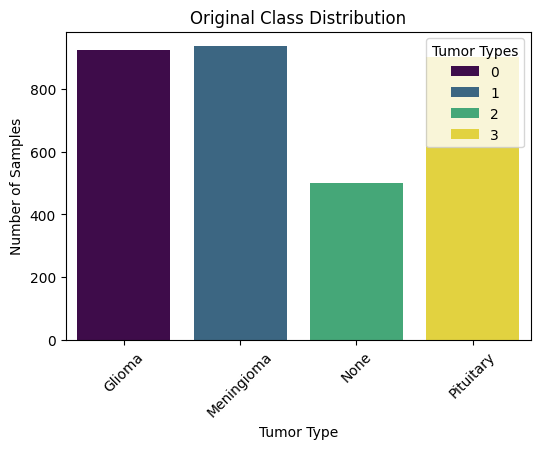

---

Augmenting class 0 with 11 synthetic samples...


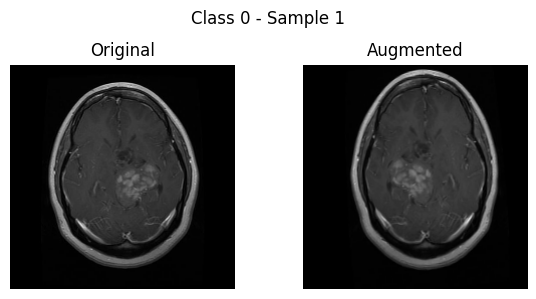

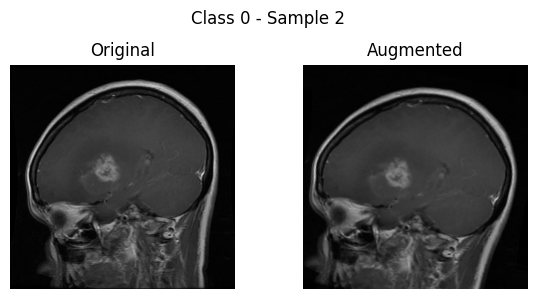

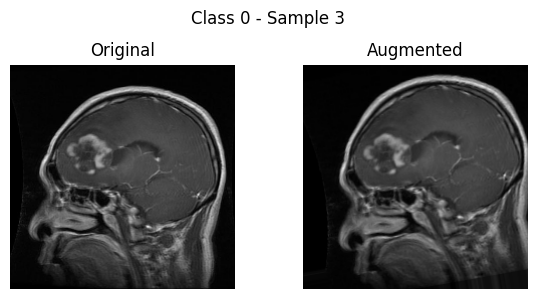

---

Augmenting class 2 with 437 synthetic samples...


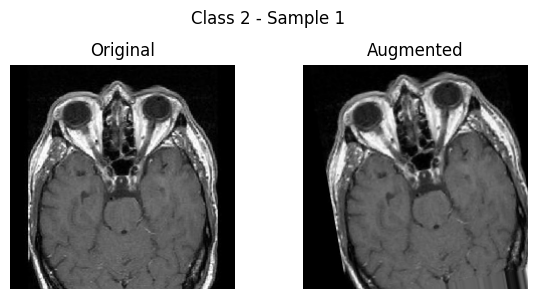

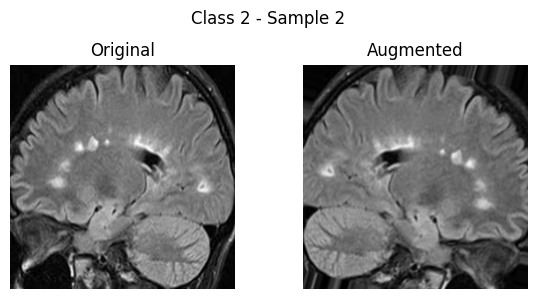

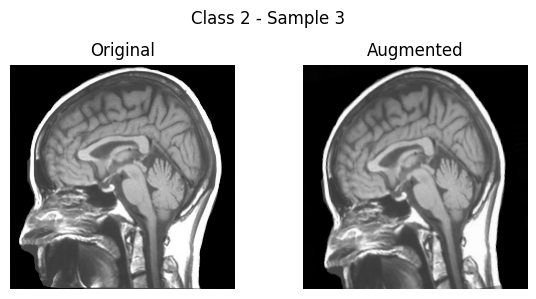

---

Augmenting class 3 with 36 synthetic samples...


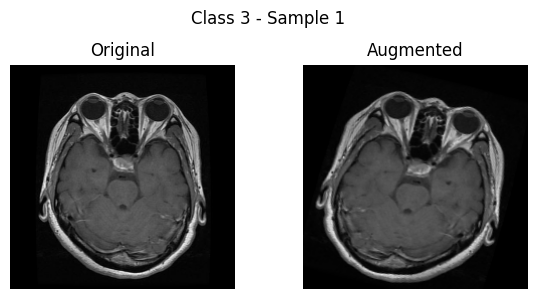

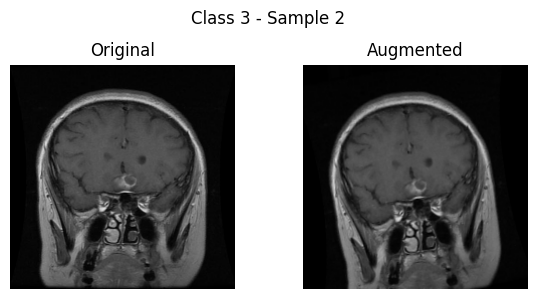

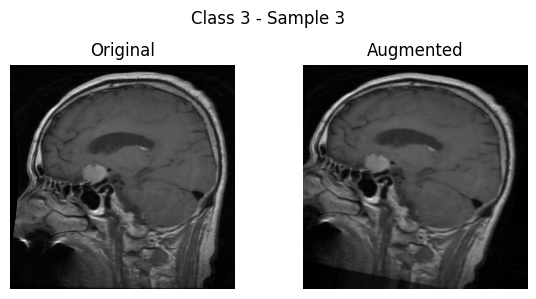

---

Augmented class distribution:
  Class 0: 937 images
  Class 1: 937 images
  Class 2: 937 images
  Class 3: 937 images

---

Final dataset shape: (3748, 224, 224, 3), Labels: (3748,)

---



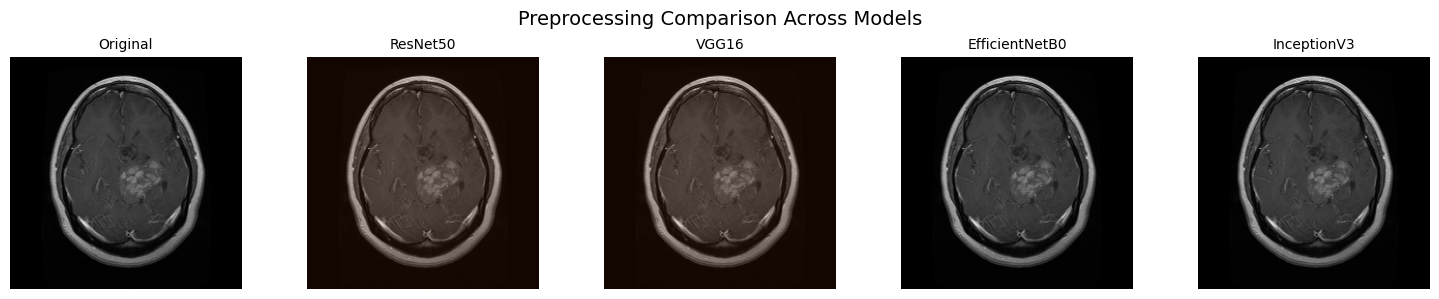

---

Train dataset distribution: [656, 656, 655, 656]
Test dataset distribution: [281, 281, 282, 281]


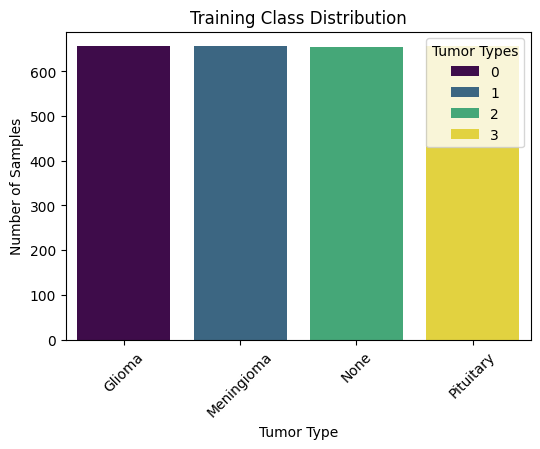

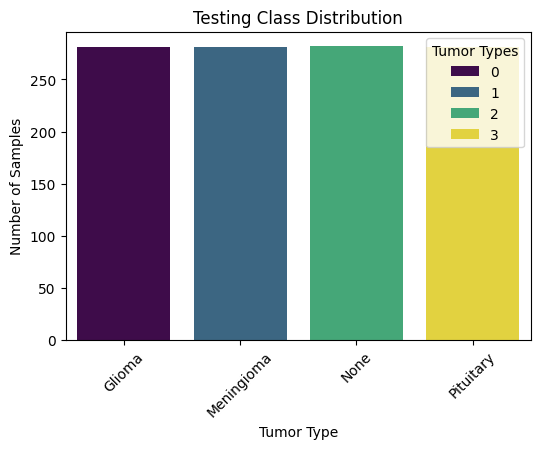

---



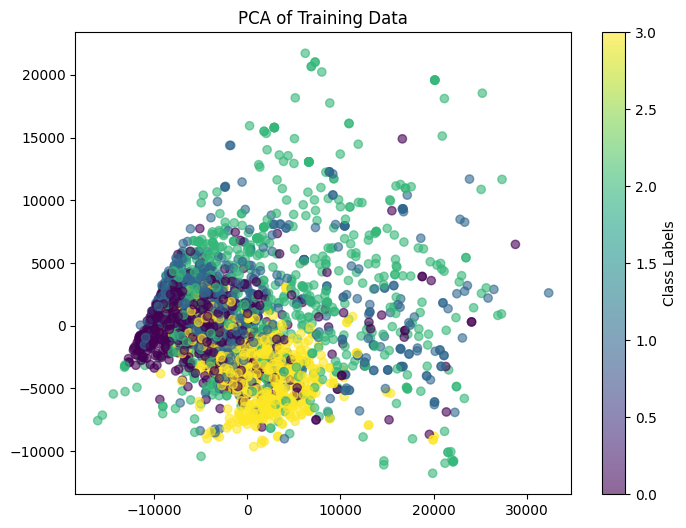

In [6]:
# Set the model name to the first model in the MODELS list
model_name = MODELS[0]  # This selects the first model name from the MODELS list

# Preprocess the data (loading, splitting, and normalizing images), and store the results
X_train, X_test, y_train, y_test, class_names = preprocess_data(model_name, verbose=True)
# X_train: Training images
# X_test: Test images
# y_train: Labels for the training data
# y_test: Labels for the test data
# class_names: List of class names corresponding to the labels

# Initialize dictionaries to store trained models and validation accuracies
trained_models = {}  # Dictionary to store models trained during the training loop
validation_accuracies_per_model = {}  # Dictionary to store validation accuracies for each trained model

---

**Model Training**

This code trains a CNN model for brain tumour classification using k-fold cross-validation. It loads a feature extractor with a custom classification head, selecting the appropriate architecture (e.g., ResNet50 or VGG16). The model is trained with stratified K-folds, addressing class imbalance with computed class weights. The best-performing model is saved, and plots of average training/validation accuracy and loss are generated.

**ResNet50**


Training Fold 1...
Epoch 1/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 61s 867ms/step - accuracy: 0.7048 - loss: 0.8807 - val_accuracy: 0.8267 - val_loss: 0.5291 - learning_rate: 0.0010
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 55s 831ms/step - accuracy: 0.9120 - loss: 0.2691 - val_accuracy: 0.8914 - val_loss: 0.3031 - learning_rate: 0.0010
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 54s 817ms/step - accuracy: 0.9580 - loss: 0.1352 - val_accuracy: 0.9162 - val_loss: 0.2614 - learning_rate: 0.0010
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 53s 801ms/step - accuracy: 0.9782 - loss: 0.0915 - val_accuracy: 0.9181 - val_loss: 0.2993 - learning_rate: 0.0010
Epoch 5/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 54s 820ms/step - accuracy: 0.9850 - loss: 0.0564 - val_accuracy: 0.9162 - val_loss: 0.2452 - learning_rate: 0.0010
Epoch 6/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 54s 822ms/step - accuracy: 0.9927 - loss: 0.0308 - val_accuracy: 0.9238 - val_loss: 0.2293 - learning_rate: 0.0010
Epoch 7/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 54s 825ms/step - accurac

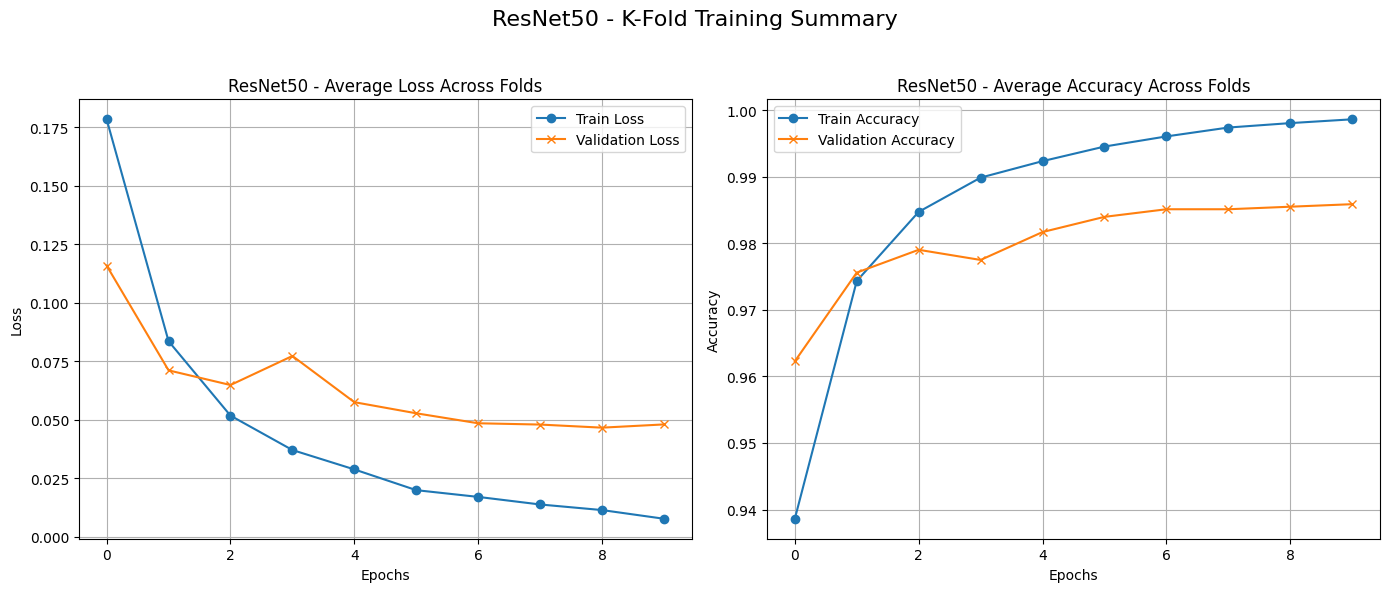

ResNet50 training complete!


In [5]:
# Get the feature extractor model for the given model name (e.g., ResNet50, VGG16, etc.)
model = get_feature_extractor(model_name)  # Loads the feature extraction model based on the model_name

# Train the model using K-Fold cross-validation and store the model along with fold validation accuracies
model, fold_accuracies = train_model(model, model_name, X_train, y_train)
# model: The trained model returned by the train_model function
# fold_accuracies: Validation accuracies across the different folds during cross-validation

# Store the validation accuracies for this model in the validation_accuracies_per_model dictionary
validation_accuracies_per_model[model_name] = fold_accuracies  # Maps the model_name to its fold accuracies

# Store the trained model and related test data in the trained_models dictionary
trained_models[model_name] = {
    "model": model,  # The trained model
    "X_test": X_test,  # The test dataset for evaluation
    "y_test": y_test,  # The test labels
    "class_names": class_names  # The list of class names for the labels
}

# Print a message indicating the model training is complete
print(f"{model_name} training complete!")  # Prints confirmation after model training is done

**VGG16**


Training Fold 1...
Epoch 1/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.9848 - loss: 0.0420 - val_accuracy: 0.9962 - val_loss: 0.0212 - learning_rate: 0.0010
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.9906 - loss: 0.0311 - val_accuracy: 0.9962 - val_loss: 0.0240 - learning_rate: 0.0010
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 147s 2s/step - accuracy: 0.9965 - loss: 0.0132 - val_accuracy: 0.9981 - val_loss: 0.0221 - learning_rate: 0.0010
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.9879 - loss: 0.0217 - val_accuracy: 0.9943 - val_loss: 0.0289 - learning_rate: 0.0010
Epoch 5/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 148s 2s/step - accuracy: 0.9970 - loss: 0.0150 - val_accuracy: 0.9981 - val_loss: 0.0208 - learning_rate: 2.0000e-04
Epoch 6/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.9985 - loss: 0.0085 - val_accuracy: 0.9981 - val_loss: 0.0224 - learning_rate: 2.0000e-04
Epoch 7/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.9

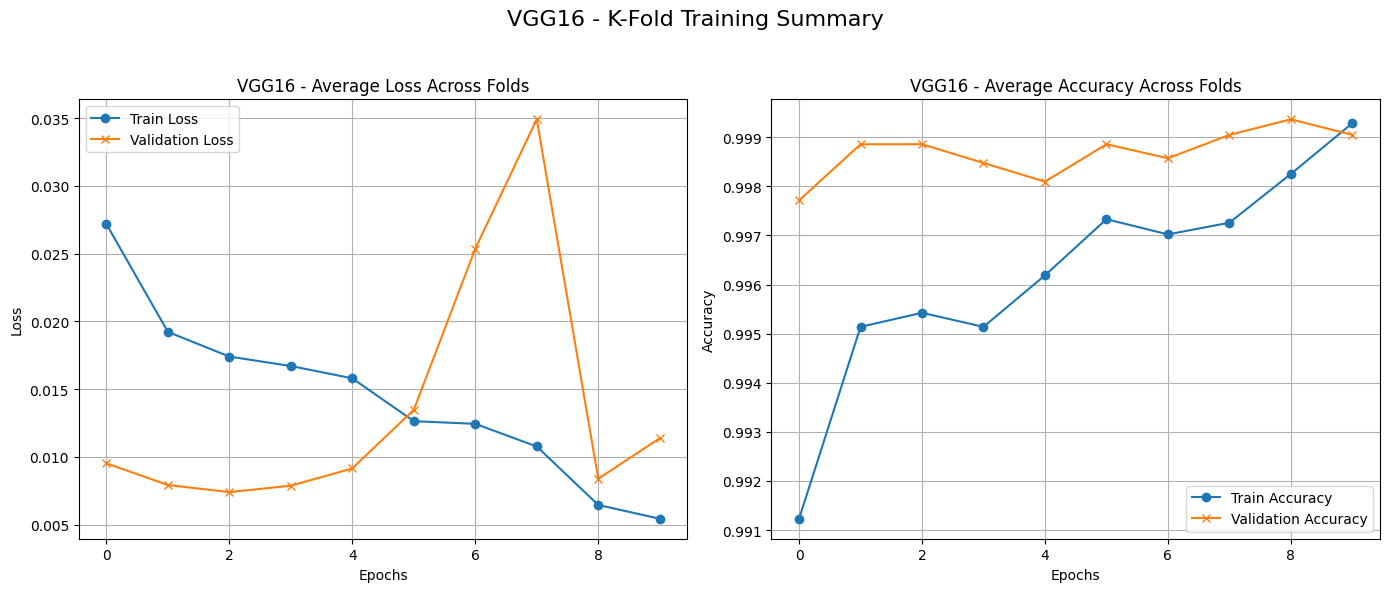

VGG16 training complete!


In [ ]:
# Select the second model from the MODELS list for training (e.g., VGG16, InceptionV3, etc.)
model_name = MODELS[1]  # Set the model name to the second model in the list

# Preprocess the data (train-test split, normalization) for the selected model
X_train, X_test, y_train, y_test, class_names = preprocess_data(model_name, verbose=False)
# X_train, X_test: Training and testing image data
# y_train, y_test: Training and testing labels
# class_names: The list of class names (e.g., Tumour types)

# Get the feature extraction model for the selected model
model = get_feature_extractor(model_name)  # Loads the feature extraction model based on model_name

# Train the model using K-Fold cross-validation and store the model and fold validation accuracies
model, fold_accuracies = train_model(model, model_name, X_train, y_train)
# model: The trained model returned by the train_model function
# fold_accuracies: Validation accuracies across the different folds during cross-validation

# Store the validation accuracies for this model in the validation_accuracies_per_model dictionary
validation_accuracies_per_model[model_name] = fold_accuracies  # Maps model_name to its fold accuracies

# Store the trained model and related test data in the trained_models dictionary
trained_models[model_name] = {
    "model": model,  # The trained model
    "X_test": X_test,  # The test dataset for evaluation
    "y_test": y_test,  # The test labels
    "class_names": class_names  # The list of class names for the labels
}

# Print a message indicating the model training is complete
print(f"{model_name} training complete!")  # Prints confirmation after model training is done

**EfficientNetB0**


Training Fold 1...
Epoch 1/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 27s 341ms/step - accuracy: 0.6859 - loss: 0.9134 - val_accuracy: 0.8210 - val_loss: 0.5788 - learning_rate: 0.0010
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 299ms/step - accuracy: 0.8685 - loss: 0.3905 - val_accuracy: 0.8857 - val_loss: 0.3553 - learning_rate: 0.0010
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 298ms/step - accuracy: 0.9189 - loss: 0.2410 - val_accuracy: 0.9010 - val_loss: 0.2924 - learning_rate: 0.0010
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 299ms/step - accuracy: 0.9437 - loss: 0.1740 - val_accuracy: 0.9124 - val_loss: 0.2296 - learning_rate: 0.0010
Epoch 5/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 293ms/step - accuracy: 0.9606 - loss: 0.1174 - val_accuracy: 0.9162 - val_loss: 0.2746 - learning_rate: 0.0010
Epoch 6/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 283ms/step - accuracy: 0.9769 - loss: 0.0854 - val_accuracy: 0.9143 - val_loss: 0.2558 - learning_rate: 0.0010
Epoch 7/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 288ms/step - accurac

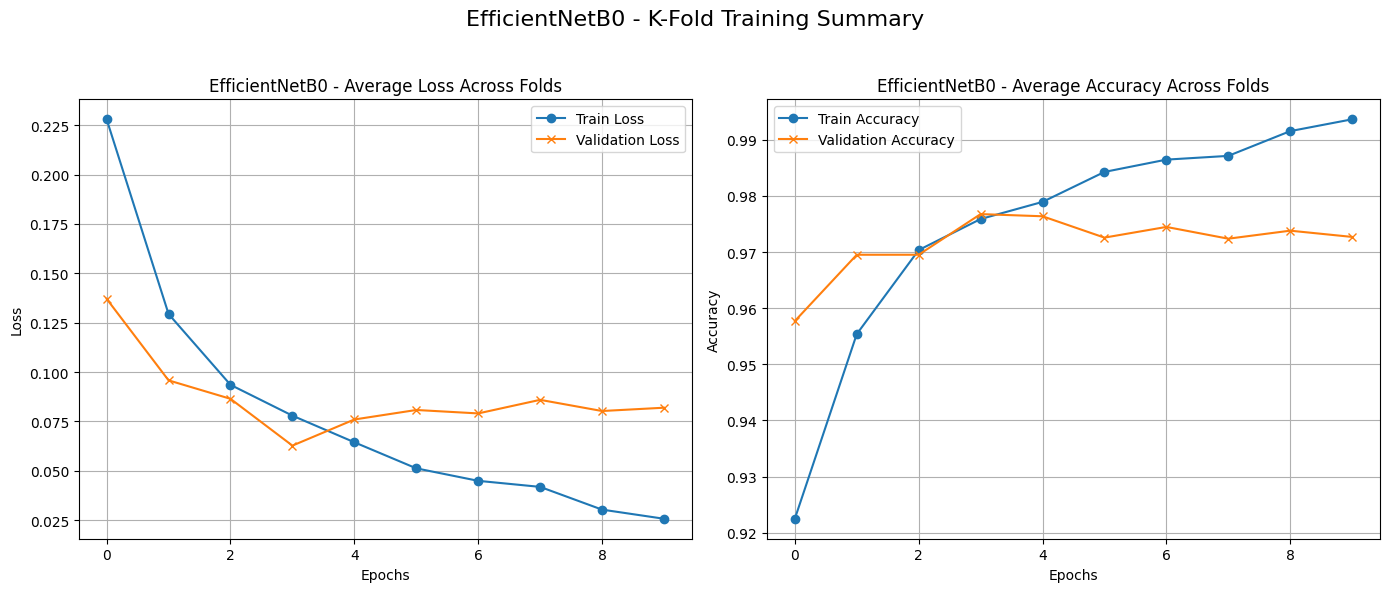

EfficientNetB0 training complete!


In [ ]:
# Select the third model from the MODELS list for training (e.g., ResNet50, EfficientNetB0, etc.)
model_name = MODELS[2]  # Set the model name to the third model in the list

# Preprocess the data (train-test split, normalization) for the selected model
X_train, X_test, y_train, y_test, class_names = preprocess_data(model_name, verbose=False)
# X_train, X_test: Training and testing image data
# y_train, y_test: Training and testing labels
# class_names: The list of class names (e.g., Tumour types)

# Get the feature extraction model for the selected model
model = get_feature_extractor(model_name)  # Loads the feature extraction model based on model_name

# Train the model using K-Fold cross-validation and store the model and fold validation accuracies
model, fold_accuracies = train_model(model, model_name, X_train, y_train)
# model: The trained model returned by the train_model function
# fold_accuracies: Validation accuracies across the different folds during cross-validation

# Store the validation accuracies for this model in the validation_accuracies_per_model dictionary
validation_accuracies_per_model[model_name] = fold_accuracies  # Maps model_name to its fold accuracies

# Store the trained model and related test data in the trained_models dictionary
trained_models[model_name] = {
    "model": model,  # The trained model
    "X_test": X_test,  # The test dataset for evaluation
    "y_test": y_test,  # The test labels
    "class_names": class_names  # The list of class names for the labels
}

# Print a message indicating the model training is complete
print(f"{model_name} training complete!")  # Prints confirmation after model training is done

**InceptionV3**


Training Fold 1...
Epoch 1/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 40s 549ms/step - accuracy: 0.6318 - loss: 1.0780 - val_accuracy: 0.8324 - val_loss: 0.5077 - learning_rate: 0.0010
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 34s 515ms/step - accuracy: 0.8722 - loss: 0.3725 - val_accuracy: 0.8019 - val_loss: 0.6202 - learning_rate: 0.0010
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 35s 537ms/step - accuracy: 0.9396 - loss: 0.2135 - val_accuracy: 0.8743 - val_loss: 0.3857 - learning_rate: 0.0010
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 35s 526ms/step - accuracy: 0.9532 - loss: 0.1551 - val_accuracy: 0.8857 - val_loss: 0.3399 - learning_rate: 0.0010
Epoch 5/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 34s 518ms/step - accuracy: 0.9824 - loss: 0.0846 - val_accuracy: 0.8838 - val_loss: 0.3490 - learning_rate: 0.0010
Epoch 6/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 35s 525ms/step - accuracy: 0.9841 - loss: 0.0670 - val_accuracy: 0.8914 - val_loss: 0.3167 - learning_rate: 0.0010
Epoch 7/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 35s 525ms/step - accurac

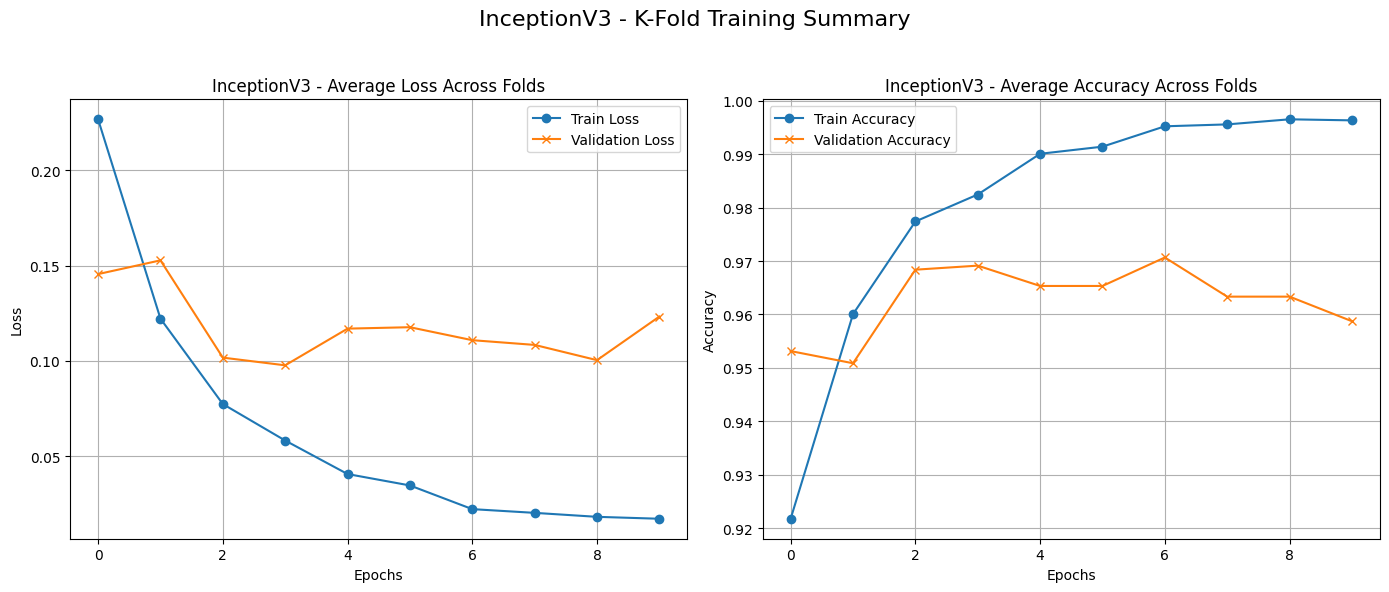

InceptionV3 training complete!


In [ ]:
# Select the fourth model from the MODELS list for training (e.g., ResNet50, EfficientNetB0, etc.)
model_name = MODELS[3]  # Set the model name to the fourth model in the list

# Preprocess the data (train-test split, normalization) for the selected model
X_train, X_test, y_train, y_test, class_names = preprocess_data(model_name, verbose=False)
# X_train, X_test: Training and testing image data
# y_train, y_test: Training and testing labels
# class_names: The list of class names (e.g., Tumour types)

# Get the feature extraction model for the selected model
model = get_feature_extractor(model_name)  # Loads the feature extraction model based on model_name

# Train the model using K-Fold cross-validation and store the model and fold validation accuracies
model, fold_accuracies = train_model(model, model_name, X_train, y_train)
# model: The trained model returned by the train_model function
# fold_accuracies: Validation accuracies across the different folds during cross-validation

# Store the validation accuracies for this model in the validation_accuracies_per_model dictionary
validation_accuracies_per_model[model_name] = fold_accuracies  # Maps model_name to its fold accuracies

# Store the trained model and related test data in the trained_models dictionary
trained_models[model_name] = {
    "model": model,  # The trained model
    "X_test": X_test,  # The test dataset for evaluation
    "y_test": y_test,  # The test labels
    "class_names": class_names  # The list of class names for the labels
}

# Print a message indicating the model training is complete
print(f"{model_name} training complete!")  # Prints confirmation after model training is done

---

**Comparison of Model Validation Accuracy (with Mean ± Std Dev)**

This visualization compares model performance by plotting the mean validation accuracy of each model with standard deviation error bars. While boxplots are commonly used to show distribution, we chose a bar plot with error bars instead, since most models achieved near-perfect accuracy across all folds, making boxplots visually uninformative. This approach more clearly highlights small differences in average performance and consistency across folds.

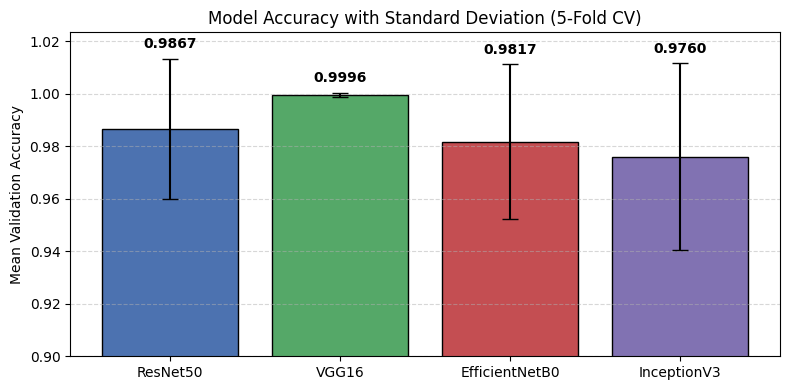

In [59]:
plot_accuracy_bar_with_std(validation_accuracies_per_model)

---

**Model Evaluation**

This code evaluates a single model from the trained_models dictionary, selected from the MODELS list. It generates a classification report with precision, recall, F1-score, and support, and calculates the model's accuracy. The confusion matrix and its normalized version are plotted, and the ROC AUC score is computed along with ROC and precision-recall curves for each class. Additional metrics like Matthews Correlation Coefficient (MCC) and Cohen's Kappa score are also calculated to assess the model's performance.

**ResNet50**


Evaluating model: ResNet50
36/36 ━━━━━━━━━━━━━━━━━━━━ 25s 666ms/step

---

Classification Report:
              precision    recall  f1-score   support

      Glioma       0.94      0.90      0.92       281
  Meningioma       0.91      0.88      0.90       281
        None       0.96      0.98      0.97       282
   Pituitary       0.95      1.00      0.97       281

    accuracy                           0.94      1125
   macro avg       0.94      0.94      0.94      1125
weighted avg       0.94      0.94      0.94      1125

---

Accuracy: 0.94

---



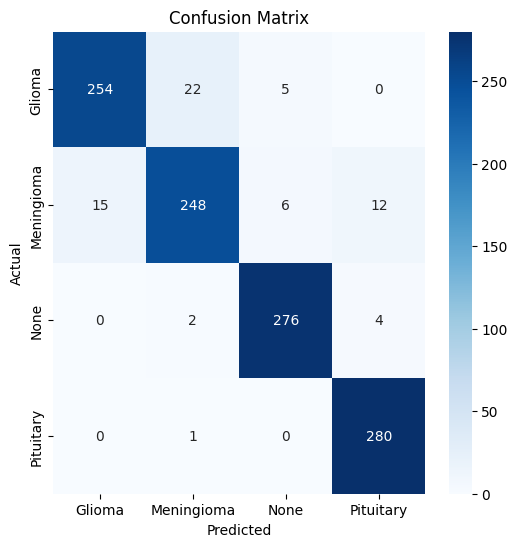

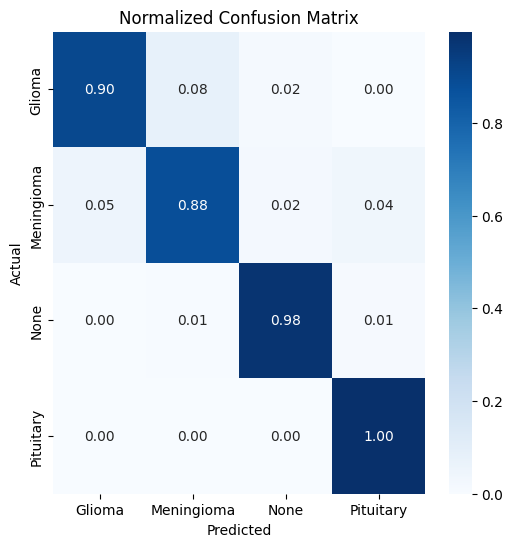

---

Multiclass ROC AUC Score: 0.99


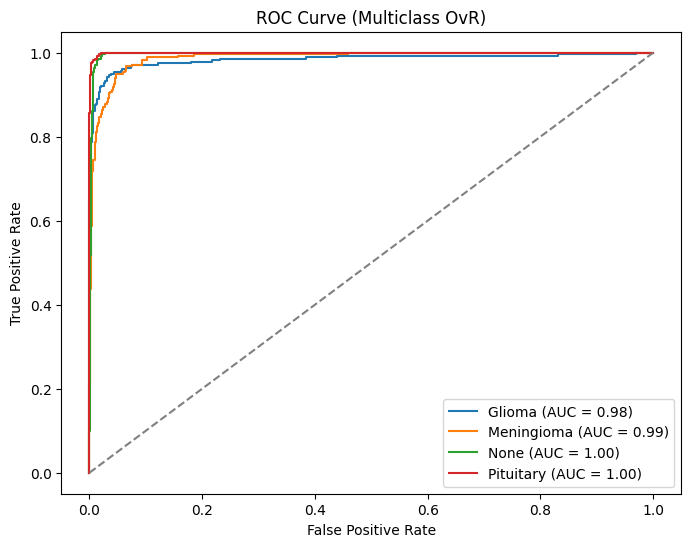

---



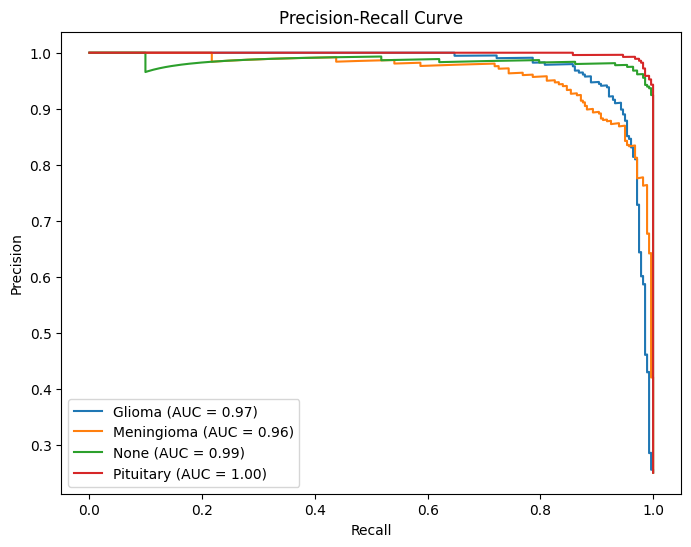

---

MCC: 0.92

---

Cohen's Kappa: 0.92


In [47]:
# Set the model name to the first model in the MODELS list
model_name = MODELS[0]

# Check if the selected model is present in the trained_models dictionary
if model_name in trained_models:
    print(f"\nEvaluating model: {model_name}")  # Print message indicating the model being evaluated

    # Call the function to evaluate the model using the test data and class names
    evaluate_single_model(
        trained_models[model_name]["model"],  # The trained model to be evaluated
        trained_models[model_name]["X_test"],  # Test data (features)
        trained_models[model_name]["y_test"],  # Test labels
        trained_models[model_name]["class_names"]  # Class names for labeling
    )
else:
    print(f"Model {model_name} not found in trained_models.")  # Print message if the model is not found in the trained models dictionary

**VGG16**


Evaluating model: VGG16
36/36 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step

---

Classification Report:
              precision    recall  f1-score   support

      Glioma       0.88      0.89      0.89       281
  Meningioma       0.91      0.85      0.88       281
        None       0.96      0.97      0.97       282
   Pituitary       0.96      0.99      0.97       281

    accuracy                           0.93      1125
   macro avg       0.93      0.93      0.93      1125
weighted avg       0.93      0.93      0.93      1125

---

Accuracy: 0.93

---



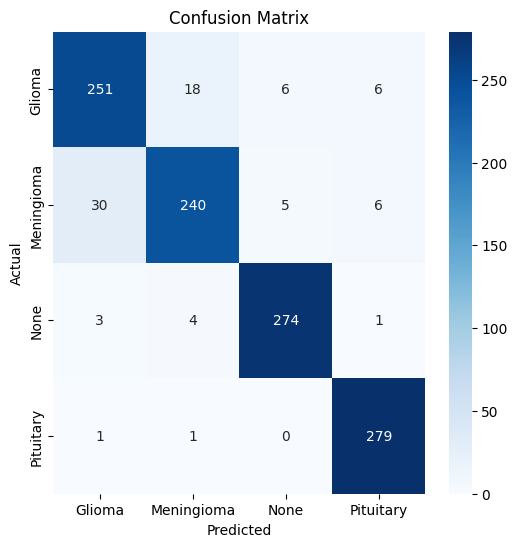

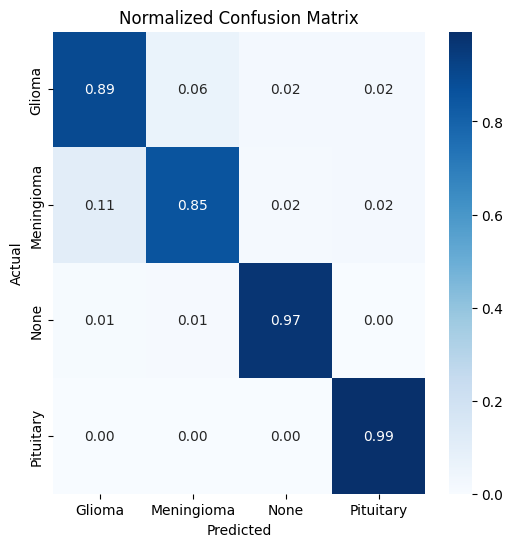

---

Multiclass ROC AUC Score: 0.99


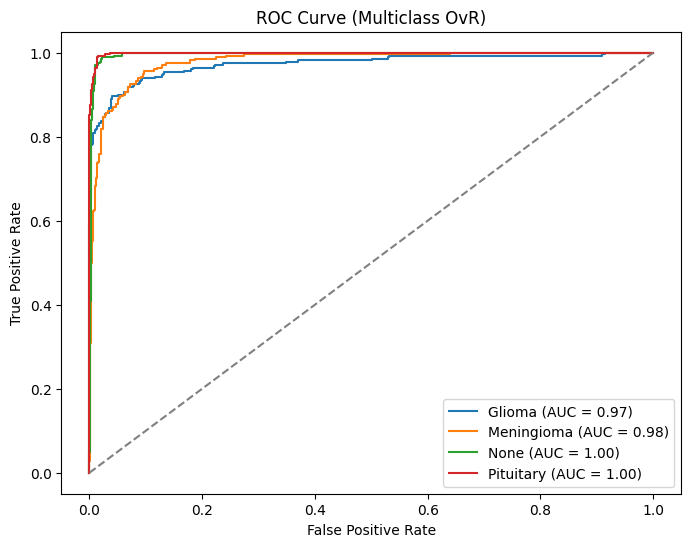

---



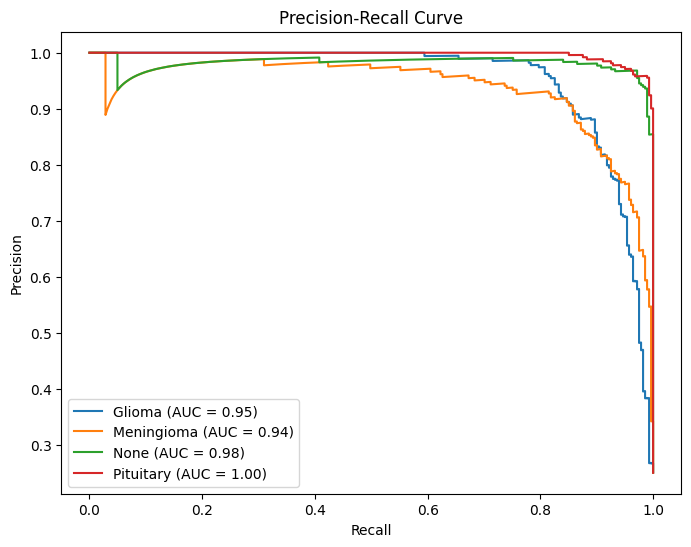

---

MCC: 0.90

---

Cohen's Kappa: 0.90


In [48]:
# Set the model name to the second model in the MODELS list
model_name = MODELS[1]

# Check if the selected model is present in the trained_models dictionary
if model_name in trained_models:
    print(f"\nEvaluating model: {model_name}")  # Print message indicating the model being evaluated

    # Call the function to evaluate the model using the test data and class names
    evaluate_single_model(
        trained_models[model_name]["model"],  # The trained model to be evaluated
        trained_models[model_name]["X_test"],  # Test data (features)
        trained_models[model_name]["y_test"],  # Test labels
        trained_models[model_name]["class_names"]  # Class names for labeling
    )
else:
    print(f"Model {model_name} not found in trained_models.")  # Print message if the model is not found in the trained models dictionary

**EfficientNetB0**


Evaluating model: EfficientNetB0
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 229ms/step

---

Classification Report:
              precision    recall  f1-score   support

      Glioma       0.88      0.93      0.90       281
  Meningioma       0.89      0.85      0.87       281
        None       0.96      0.97      0.96       282
   Pituitary       0.98      0.96      0.97       281

    accuracy                           0.93      1125
   macro avg       0.93      0.93      0.93      1125
weighted avg       0.93      0.93      0.93      1125

---

Accuracy: 0.93

---



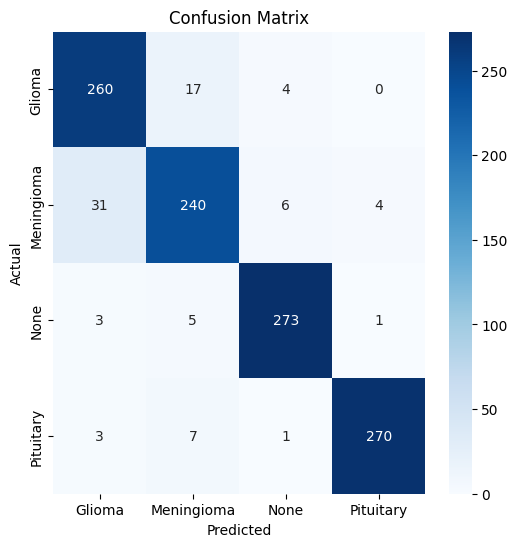

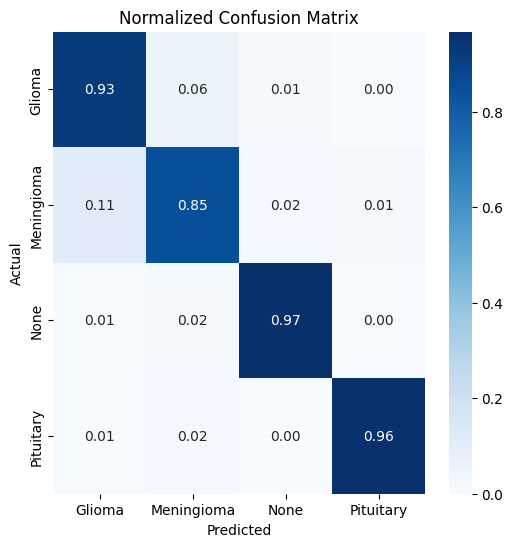

---

Multiclass ROC AUC Score: 0.99


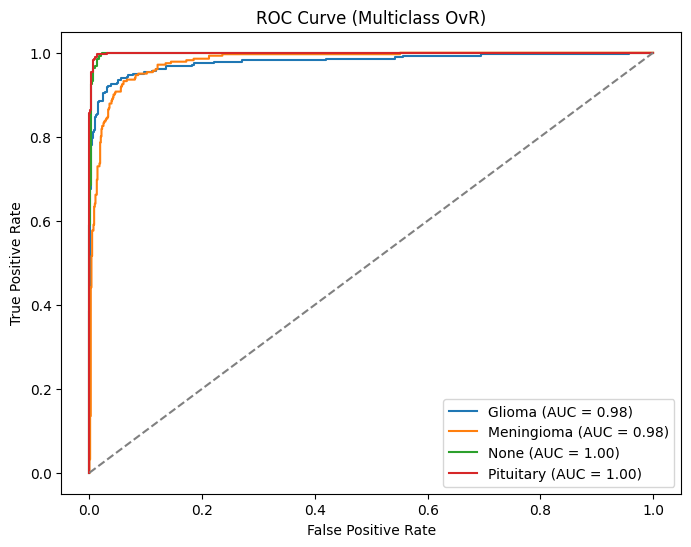

---



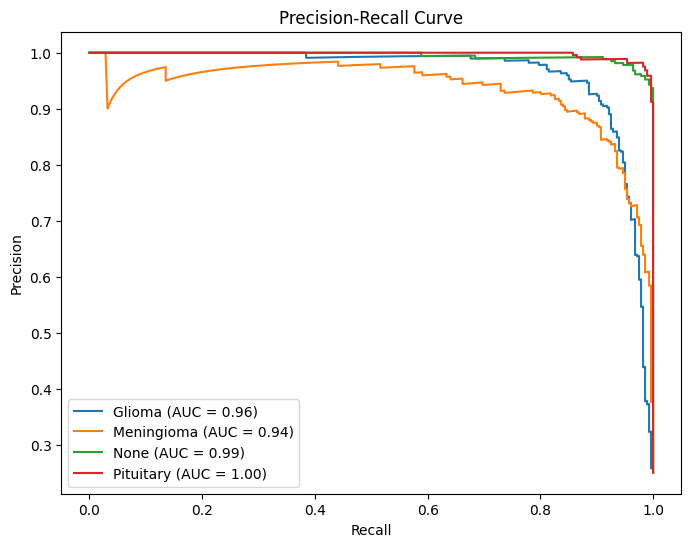

---

MCC: 0.90

---

Cohen's Kappa: 0.90


In [49]:
# Set the model name to the third model in the MODELS list
model_name = MODELS[2]

# Check if the selected model is present in the trained_models dictionary
if model_name in trained_models:
    print(f"\nEvaluating model: {model_name}")  # Print message indicating the model being evaluated

    # Call the function to evaluate the model using the test data and class names
    evaluate_single_model(
        trained_models[model_name]["model"],  # The trained model to be evaluated
        trained_models[model_name]["X_test"],  # Test data (features)
        trained_models[model_name]["y_test"],  # Test labels
        trained_models[model_name]["class_names"]  # Class names for labeling
    )
else:
    print(f"Model {model_name} not found in trained_models.")  # Print message if the model is not found in the trained models dictionary

**InceptionV3**


Evaluating model: InceptionV3
36/36 ━━━━━━━━━━━━━━━━━━━━ 16s 416ms/step

---

Classification Report:
              precision    recall  f1-score   support

      Glioma       0.91      0.85      0.88       281
  Meningioma       0.81      0.90      0.85       281
        None       0.96      0.95      0.96       282
   Pituitary       0.96      0.91      0.94       281

    accuracy                           0.90      1125
   macro avg       0.91      0.90      0.91      1125
weighted avg       0.91      0.90      0.91      1125

---

Accuracy: 0.90

---



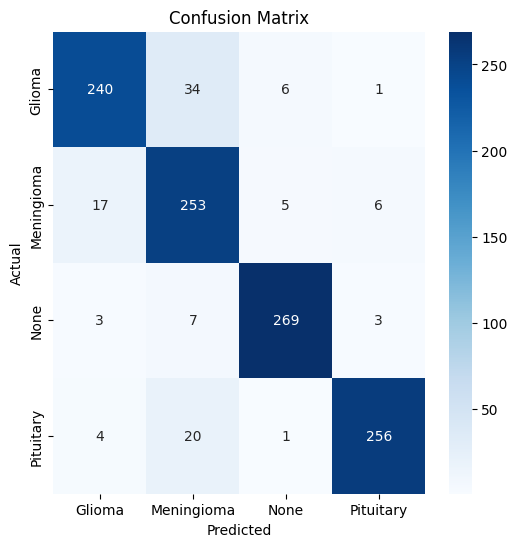

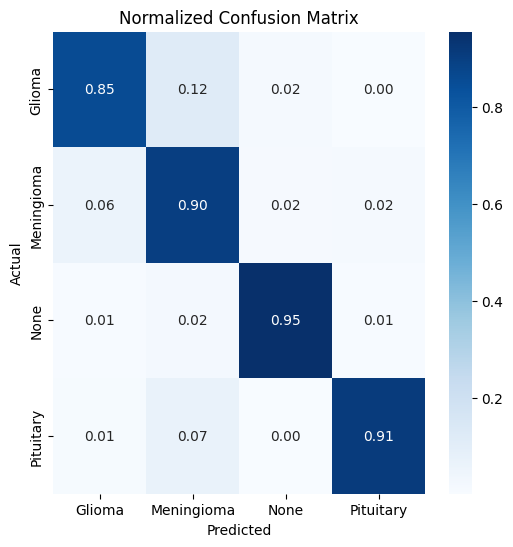

---

Multiclass ROC AUC Score: 0.98


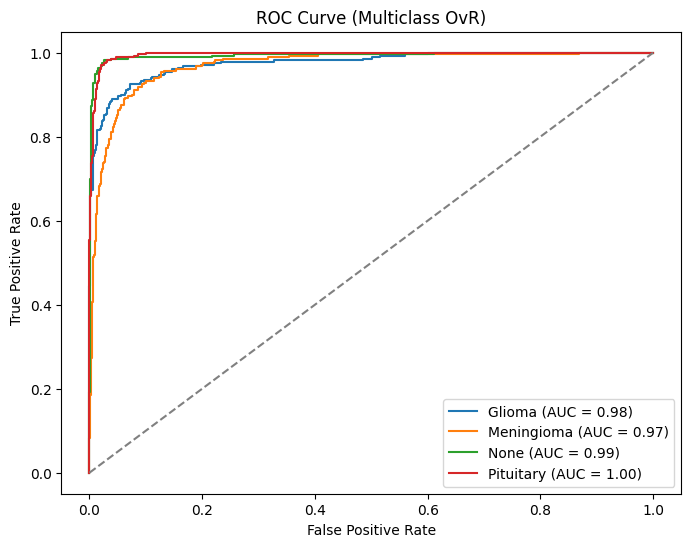

---



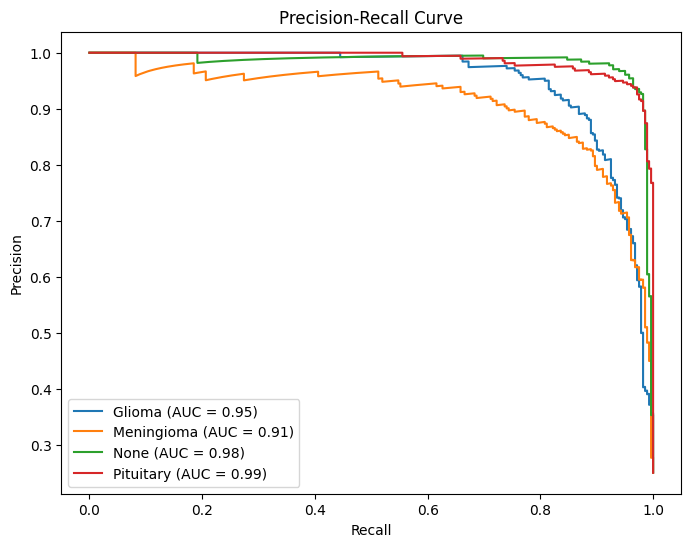

---

MCC: 0.87

---

Cohen's Kappa: 0.87


In [50]:
# Set the model name to the fourth model in the MODELS list
model_name = MODELS[3]

# Check if the selected model is present in the trained_models dictionary
if model_name in trained_models:
    print(f"\nEvaluating model: {model_name}")  # Print message indicating the model being evaluated

    # Call the function to evaluate the model using the test data and class names
    evaluate_single_model(
        trained_models[model_name]["model"],  # The trained model to be evaluated
        trained_models[model_name]["X_test"],  # Test data (features)
        trained_models[model_name]["y_test"],  # Test labels
        trained_models[model_name]["class_names"]  # Class names for labeling
    )
else:
    print(f"Model {model_name} not found in trained_models.")  # Print message if the model is not found in the trained models dictionary

---

**Model Comparison**

This code evaluates multiple models by calculating precision, recall, F1-score, and accuracy for each. It stores these metrics in a DataFrame, adds summary rows with average metrics, and organizes the results for easy comparison across models. The final output is a table that allows you to compare the performance of each model based on key classification metrics.

In [53]:
# Call the compare_models function to evaluate and compare the performance of all models in the trained_models dictionary
compare_models(trained_models)

Evaluating Models...

36/36 ━━━━━━━━━━━━━━━━━━━━ 22s 606ms/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 195ms/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 14s 380ms/step


ResNet50                     VGG16                 EfficientNetB0  \
         Precision Recall F1-score Precision Recall F1-score      Precision   
CLASS                                                                         
0             0.94    0.9     0.92      0.88   0.89     0.89           0.88   
1             0.91   0.88      0.9      0.91   0.85     0.88           0.89   
2             0.96   0.98     0.97      0.96   0.97     0.97           0.96   
3             0.95    1.0     0.97      0.96   0.99     0.97           0.98   
Average       0.94   0.94     0.94      0.93   0.93     0.93           0.93   
Accuracy      0.94                      0.93                           0.93   

                         InceptionV3                  
         Recall F1-score   Precision Recall F1-score  
CLASS                                                 
0          0.93      0.9        0.91   0.85     0.88  
1          0.85     0.87        0.81    0.9     0.85  
2          0.97     0.96        0.96   0.95     0.96  
3          0.96     0.97        0.96   0.91     0.94  
Average    0.93     0.93        0.91    0.9     0.91  
Accuracy                        0.90